In [1]:
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [15, 8]
data_folder = "../data/processed/covid/"

In [3]:
policy = pd.read_csv(data_folder+"policy_data.csv", index_col='record_id', parse_dates=['date_announced'])
grp_m = pd.Grouper(key='date_announced', freq='M')
b4_2021 = pd.Timestamp('2021-01-01')

In [4]:
policy = policy.loc[policy.date_announced < b4_2021]

In [6]:
policy.type.unique()

array(['Health Monitoring', 'Public Awareness Measures', 'Hygiene',
       'Other Policy Not Listed Above', 'Health Resources',
       'New Task Force, Bureau or Administrative Configuration',
       'External Border Restrictions', 'Internal Border Restrictions',
       'Restrictions of Mass Gatherings',
       'Closure and Regulation of Schools',
       'Restriction and Regulation of Businesses',
       'Restriction and Regulation of Government Services',
       'Declaration of Emergency', 'Quarantine', 'Health Testing',
       'Social Distancing', 'Lockdown', 'Anti-Disinformation Measures',
       'Curfew'], dtype=object)

In [16]:
def v(df):
    return df.type.value_counts()/len(df.index)
pg = policy.groupby(grp_m).apply(v)

In [36]:
pg.index.get_level_values(0).unique()

DatetimeIndex(['2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31',
               '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31',
               '2020-08-31'],
              dtype='datetime64[ns]', name='date_announced', freq=None)

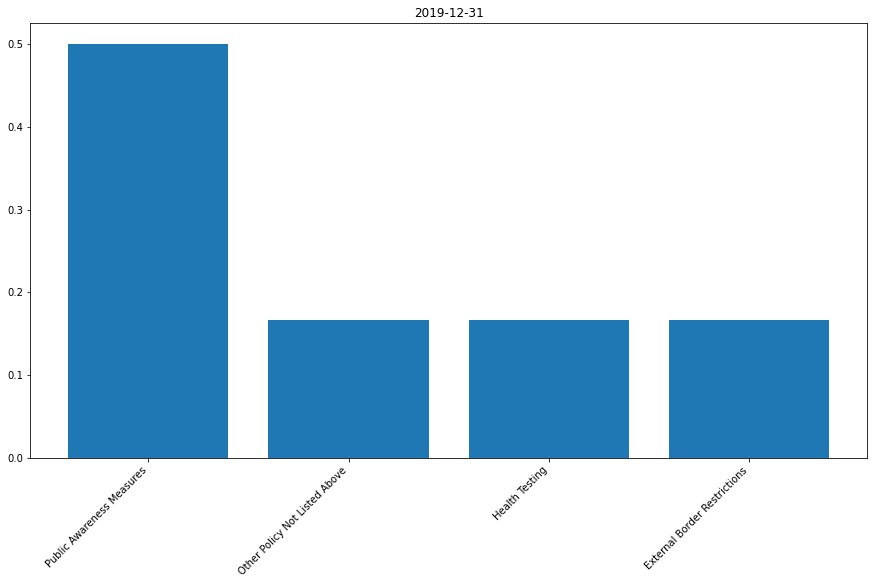

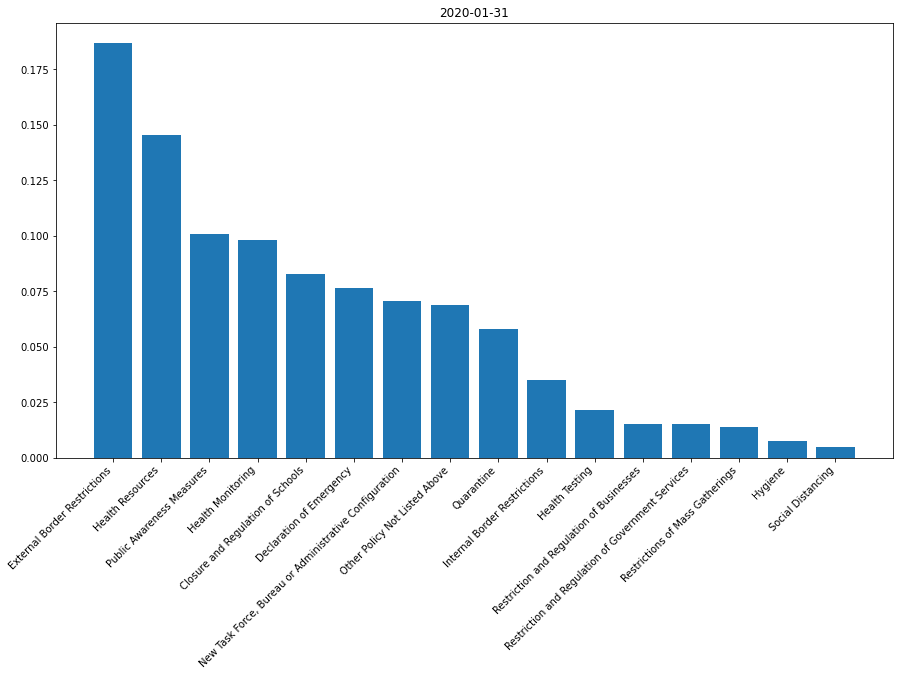

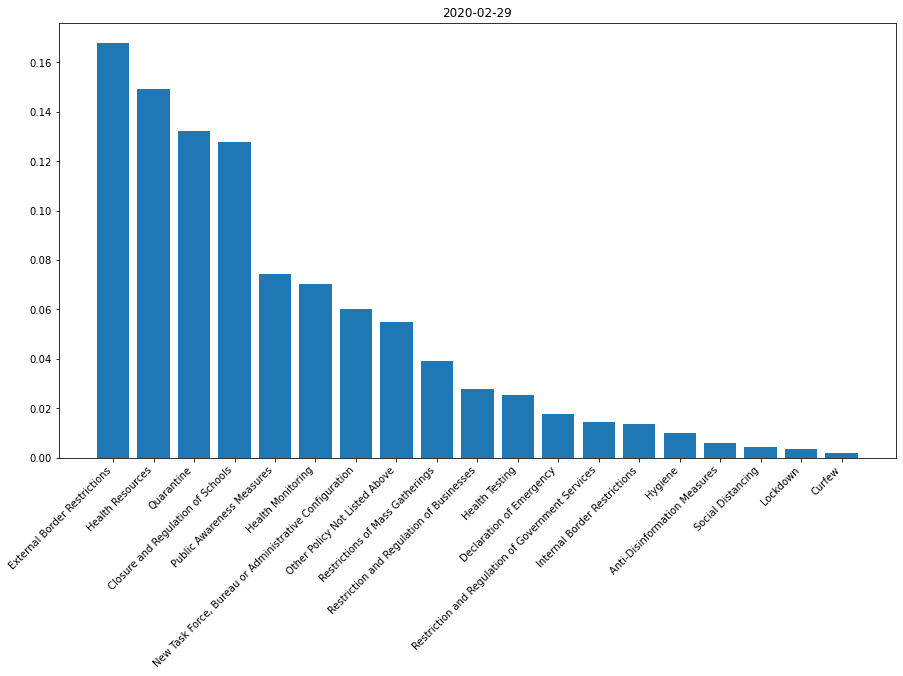

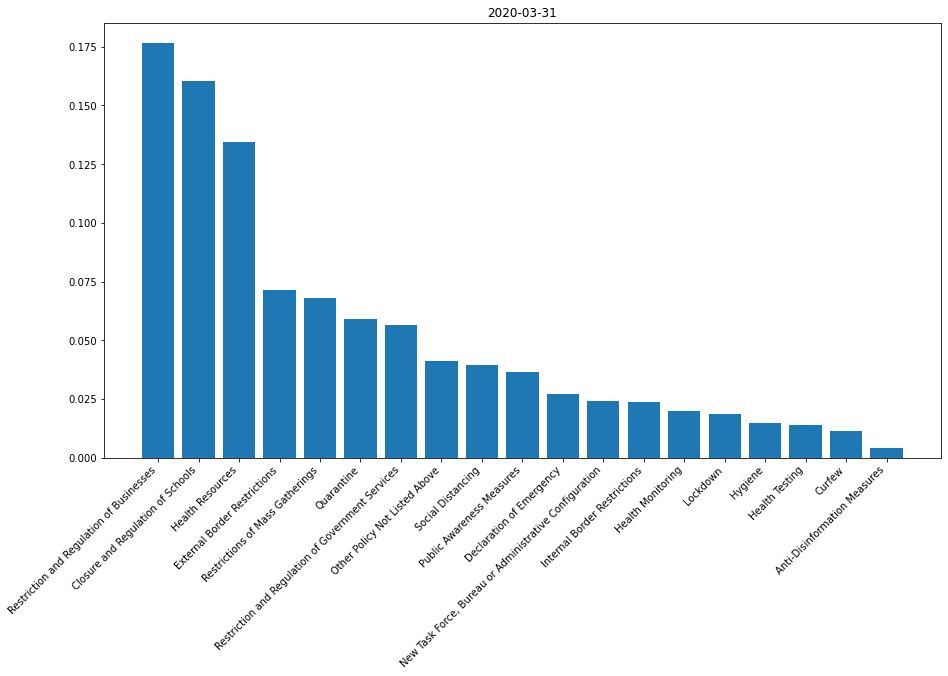

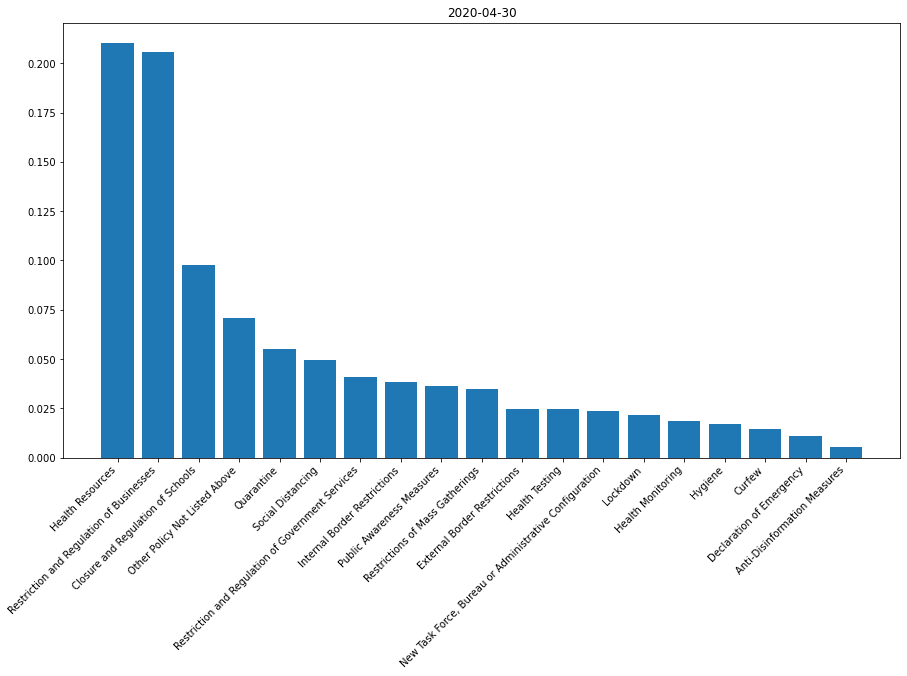

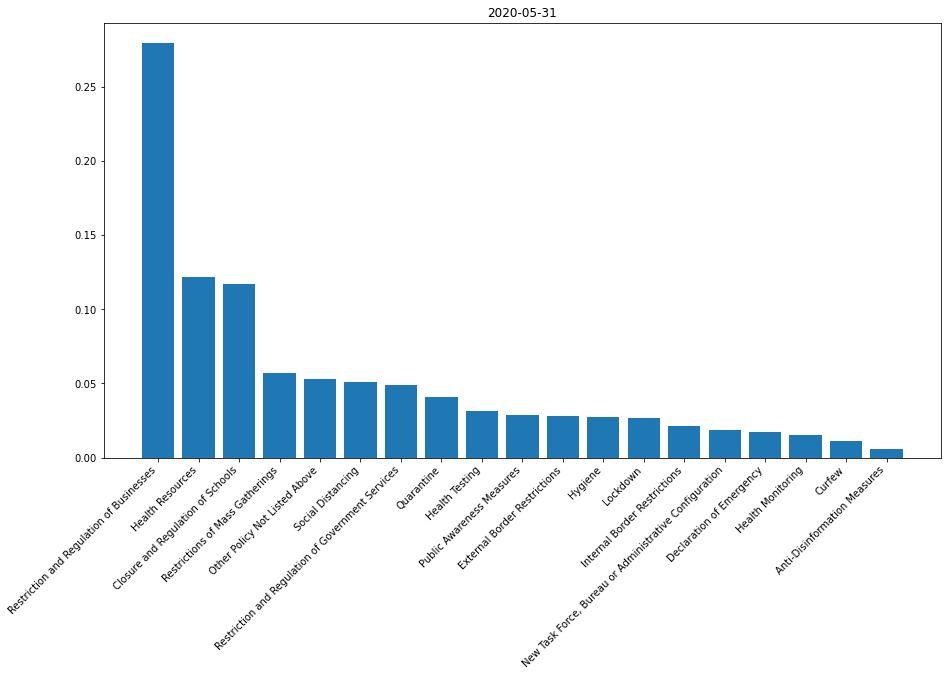

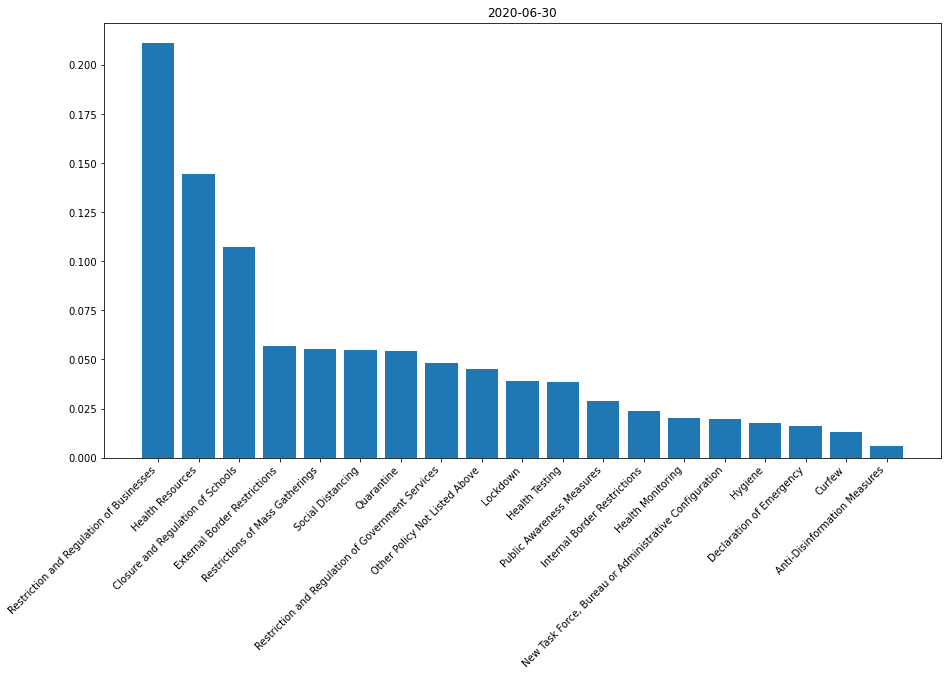

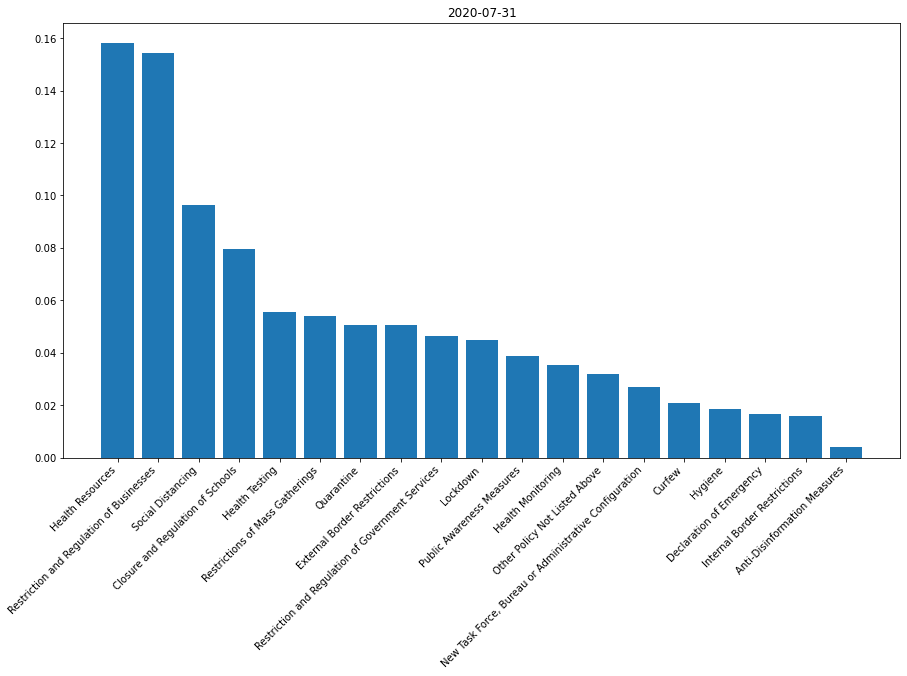

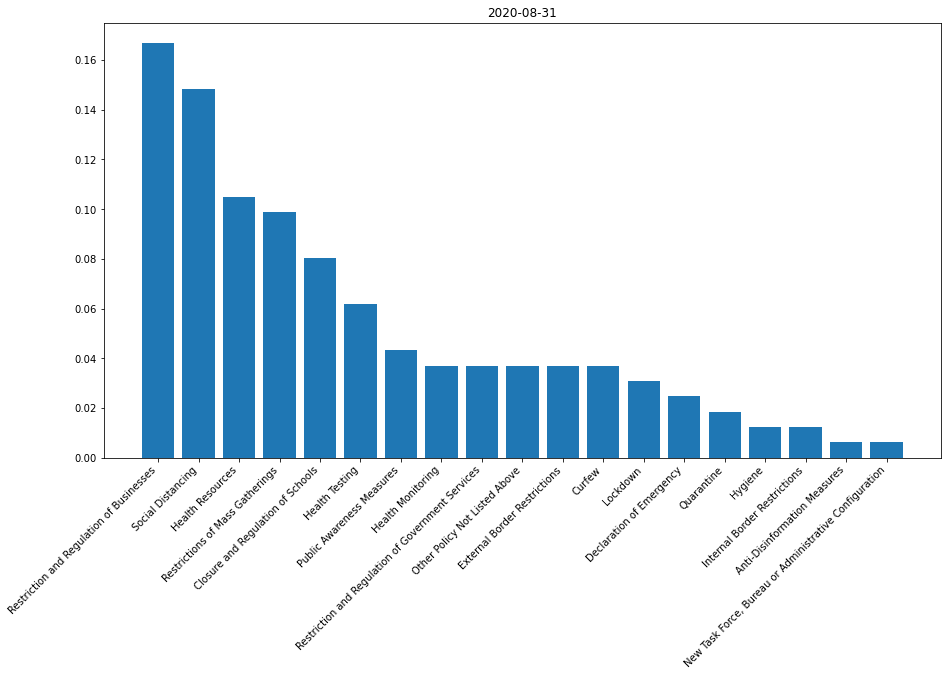

In [37]:
for i in pg.index.get_level_values(0).unique():
    d = pg[i]
    plt.xticks(rotation=45, ha='right')
    plt.title(i.date())
    b = plt.bar(d.index, d)
    plt.show()